In [1]:
%%capture
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
import numpy as np
from IPython.display import display, HTML
from neuronunit.plottools import plot_score_history1
from neuronunit.optimisation.optimization_management import TSD

import pandas as pd
import pickle
import copy
from neuronunit.optimisation.model_parameters import MODEL_PARAMS

Reduced models are exceptionally bad at reproducing
# input resistance
# Rheobase test

In [5]:
#%%capture
model_type="NEURONHH"
#fps = ['g_L','g_Na','g_K']    
MU = 10 
NGEN = 10
#import make_sim_tests
#sim_tests, OM, target = make_sim_tests.test_all_objective_test(fps,model_type=model_type)
mitral = pickle.load(open("contains_mitral.p","rb"))
mitral[0]['olf_mit']
mitral[1]['olf_mit'];


In [6]:
cells = pickle.load(open("processed_multicellular_constraints.p","rb"))

ncl5_shape = TSD(cells["Neocortex pyramidal cell layer 5-6"])
vr = ncl5_shape["RestingPotentialTest"].observation['mean']

ncl5_electric = copy.copy(ncl5_shape)
ncl5_shape.pop('RheobaseTest',None)
#ncl5_shape.pop('InputResistanceTest',None)
ncl5_shape.pop('CapacitanceTest',None)
ncl5_shape.pop('InjectedCurrentAPThresholdTest',None)

test_other = {}
#ncl5_shape =

test_other['RheobaseTest'] =  TSD(cells["Neocortex pyramidal cell layer 5-6"])['RheobaseTest']
#test_other['InputResistanceTest'] =  TSD(cells["Neocortex pyramidal cell layer 5-6"])['InputResistanceTest']               

#ncl5_shape.pop('TimeConstantTest',None)
#ncl5_shape.pop('CapacitanceTest',None)

#ncl5_electric.pop('InjectedCurrentAPThresholdTest',None)
#ncl5_electric.pop('InjectedCurrentAPAmplitudeTest',None)
#ncl5_electric.pop('InjectedCurrentAPWidthTest',None)
ncl5_electric.pop('RestingPotentialTest',None)
ncl5_electric.pop('RheobaseTest',None)
ncl5_electric.pop('InputResistanceTest',None)
ncl5_electric.pop('CapacitanceTest',None)


# Meta Parameters

30


GA Generation Progress: 100%|██████████| 14/14 [16:26<00:00, 70.47s/it] 


"\ntest_other\n\ntwo = TSD(test_other).optimize(backend=model_type,        protocol={'allen': False, 'elephant': True},            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)\nopt = two['hof'][0].dtc\n#OM.tests = opt.tests\n#opt = OM.format_test(opt)\nopt.self_evaluate()\nopt.get_agreement()\ndisplay(opt.agreement)\n"

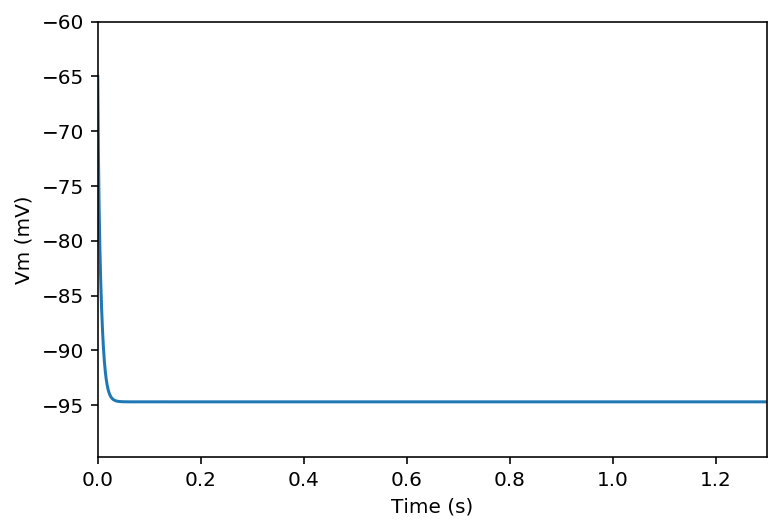

In [7]:
MU = 30
NGEN = 15
fps = MODEL_PARAMS["NEURONHH"]
results_shape = ncl5_shape.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=False,free_parameters=fps)
'''
test_other

two = TSD(test_other).optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)
opt = two['hof'][0].dtc
#OM.tests = opt.tests
#opt = OM.format_test(opt)
opt.self_evaluate()
opt.get_agreement()
display(opt.agreement)
'''

In [8]:
ncl5_electric.pop('RestingPotentialTest',None)
ncl5_electric.pop('RheobaseTest',None)
ncl5_electric.pop('InputResistanceTest',None)
ncl5_electric.pop('CapacitanceTest',None)

In [9]:
opt = results_shape['hof'][0].dtc

opt.attrs
test_other['RheobaseTest'] =  TSD(cells["Neocortex pyramidal cell layer 5-6"])['RheobaseTest']
test_other['InputResistanceTest'] =  TSD(cells["Neocortex pyramidal cell layer 5-6"])['InputResistanceTest']               

#opt.tests = ncl5_shape

opt.self_evaluate()
opt.get_agreement()
display(opt.agreement)

,InputResistanceTest,TimeConstantTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,total
observations,120.672073643411 Mohm,15.7342424242424 ms,-68.2481434599156 mV,1.20769387755102 ms,80.4351020408164 mV,NaN
predictions,68.49876103410962 Mohm,3.240678016498422 ms,-71.45127851846709 mV,2.2500000000000004 ms,96.56296495933 mV,NaN
scores,0.690047,2.4361,0.471787,2.97393,1.58059,22.138428


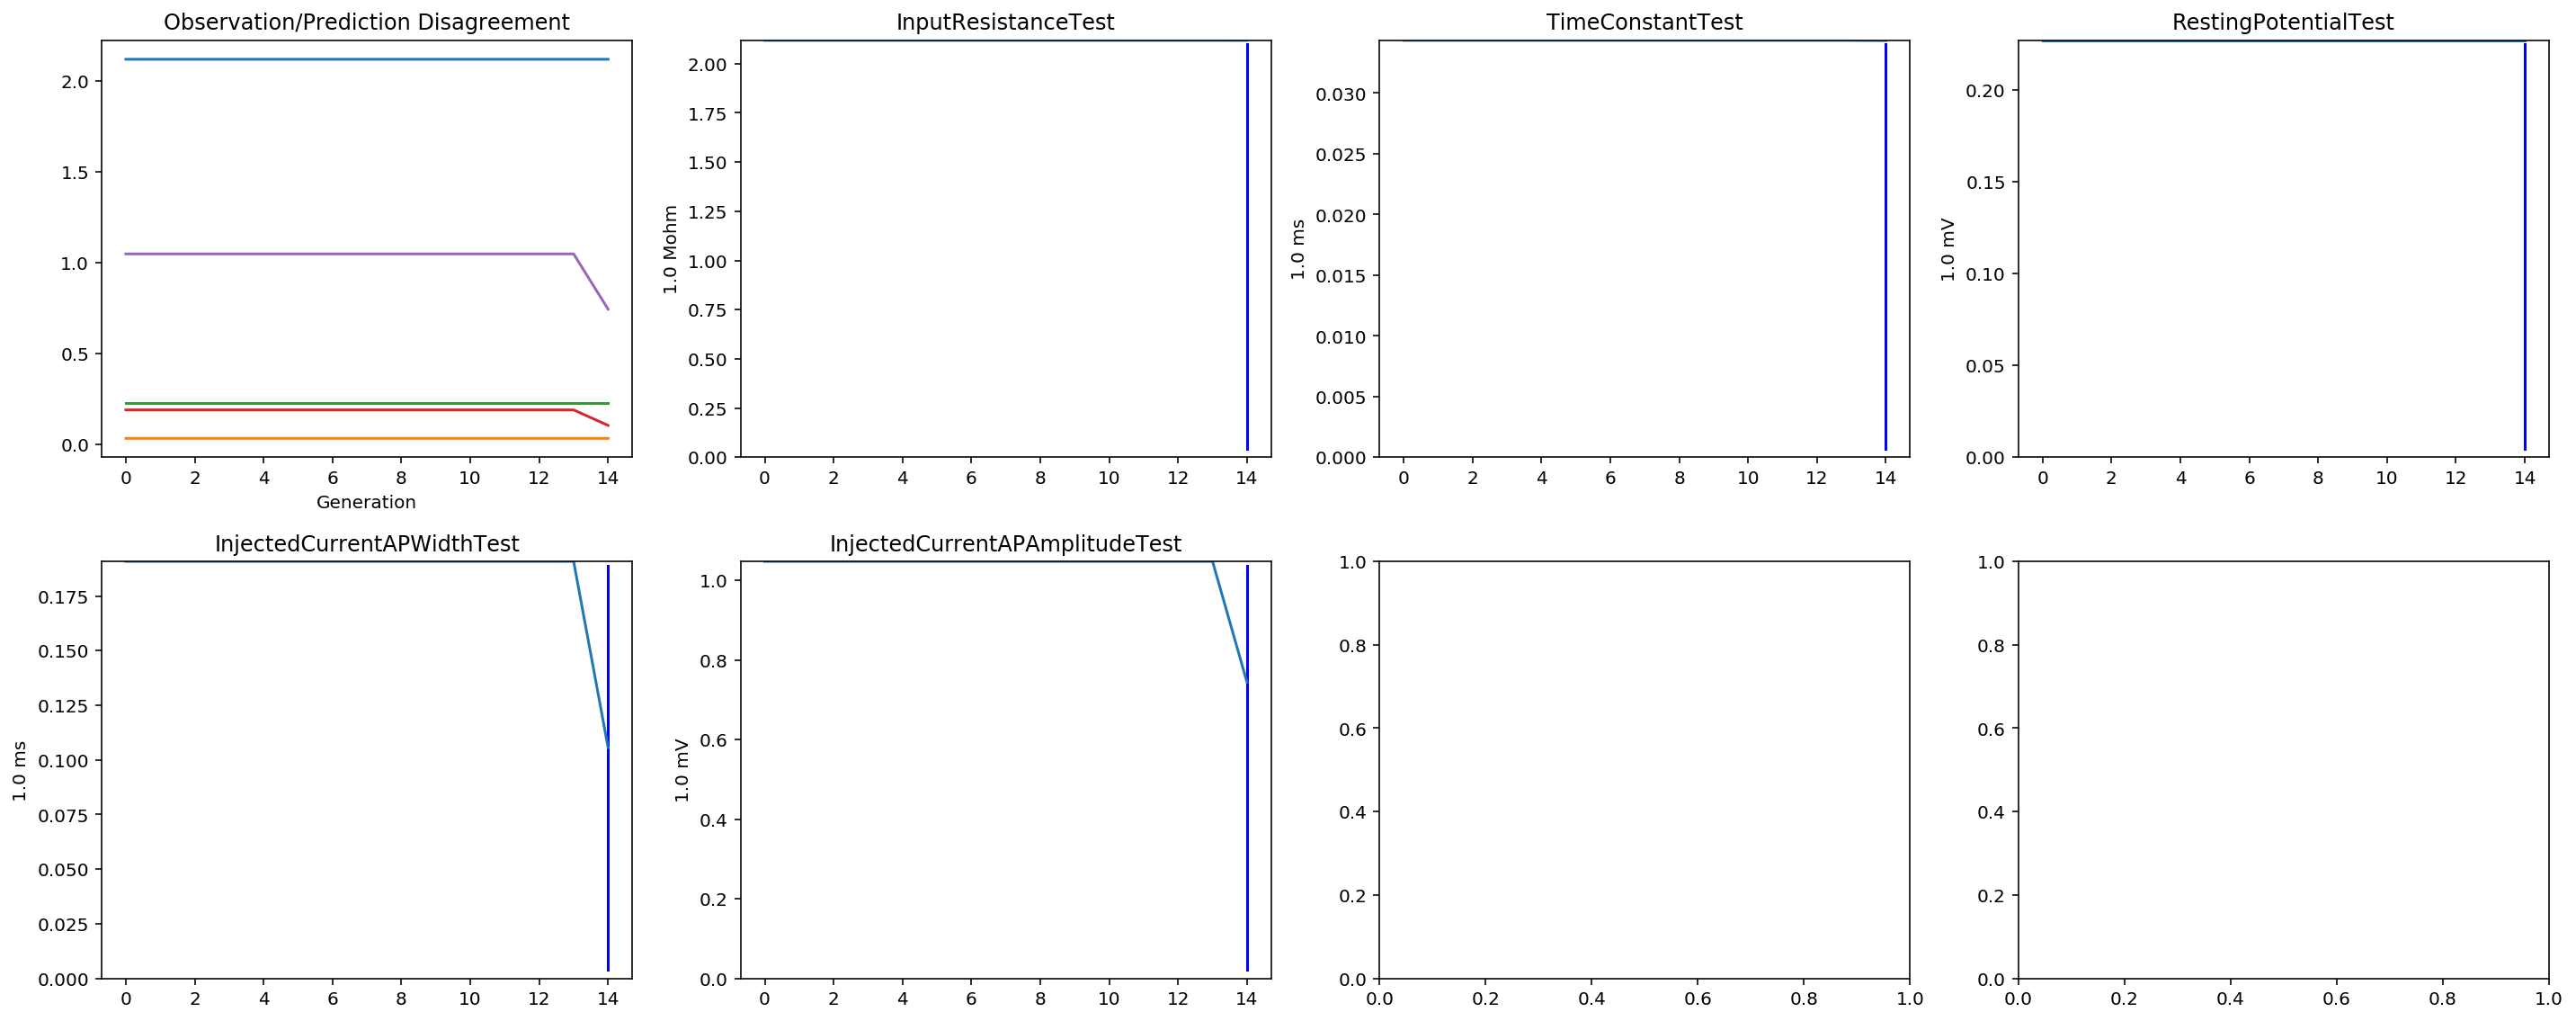

In [10]:
plt = plot_score_history1(results_shape)
plt.show()

In [11]:
#ncl5_shape['RheobaseTest'] =  TSD(cells["Neocortex pyramidal cell layer 5-6"])['RheobaseTest']
ncl5_shape['InputResistanceTest'] =  TSD(cells["Neocortex pyramidal cell layer 5-6"])['InputResistanceTest']            
opt.tests = ncl5_shape
opt.self_evaluate()
opt.get_agreement()
display(opt.agreement)

,InputResistanceTest,TimeConstantTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,total
observations,120.672073643411 Mohm,15.7342424242424 ms,-68.2481434599156 mV,1.20769387755102 ms,80.4351020408164 mV,NaN
predictions,68.49876103410962 Mohm,3.240678016498422 ms,-71.45127851846709 mV,2.2500000000000004 ms,96.56296495933 mV,NaN
scores,0.690047,2.4361,0.471787,2.97393,1.58059,22.138428


In [12]:
'''
results_electric = ncl5_electric.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)
opt = results_electric['hof'][0].dtc
#OM.tests = opt.tests
#opt = OM.format_test(opt)
'''

"\nresults_electric = ncl5_electric.optimize(backend=model_type,        protocol={'allen': False, 'elephant': True},            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)\nopt = results_electric['hof'][0].dtc\n#OM.tests = opt.tests\n#opt = OM.format_test(opt)\n"

In [13]:
del results_electric

NameError: name 'results_electric' is not defined

In [ ]:
opt

In [ ]:
results_shape = ncl5_shape.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)


In [ ]:
opt = results_shape['hof'][0].dtc
#OM.tests = opt.tests
#opt = OM.format_test(opt)
opt.self_evaluate()
opt.get_agreement()
display(opt.agreement)

In [ ]:
opt = results_shape['hof'][0].dtc


objectives = {k.name:v for k,v in opt.SA.items() }
objectives

In [ ]:
ncl5_shape = TSD(cells["Neocortex pyramidal cell layer 5-6"])

opt.tests = ncl5_shape
opt.self_evaluate()
opt.SA
opt.get_agreement()
opt.agreement

In [ ]:
results_shape['history'].genealogy_history[1].dtc

results_shape['history'].genealogy_history.values();

In [ ]:
import math
def plot_score_history1(ga_out,figname=None):
    """
    Adapted from pyfrume.
    """
    opt = results['hof'][0].dtc

    objectives = {k.name:v for k,v in opt.SA.items() }
    objectives

    logbook = ga_out['log']
    min_gene_evol = [ m['min'] for m in logbook ]
    min_gene_evol_dtc = []
    for value in results['history'].genealogy_history.values():
        if set(value) in set(min_gene_evol):
            min_gene_evol_dtc.append(value.dtc)
            
    print(min_gene_evol_dtc)
    get_min = [(np.sum(j),i) for i,j in enumerate(scores)]
    min_x = sorted(get_min,key = lambda x: x[0])[0][1]
    fig,axes = plt.subplots(2,math.ceil(len(objectives)/2+1),figsize=(20,8))
    axes[0,0].plot(scores)
    axes[0,0].set_title('Observation/Prediction Disagreement')
    for i,(k,v) in enumerate(objectives.items()):
        ax = axes.flat[i+1]
        history = [j[i] for j in scores ]
        ax.axvline(x=min_x , ymin=0.02, ymax=0.99,color='blue',label='best candidate sampled')
        ax.plot(history)
        ax.set_title(str(k))
        ax.set_ylim([np.min(0.0), np.max(history)])
        ax.set_ylabel(str(front[0].dtc.tests[i].observation['std'].units))
    axes[0,0].set_xlabel("Generation")
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname)
    else:
        plt.show()
    return plt


opt = results['hof'][0].dtc

objectives = {k.name:v for k,v in opt.SA.items() }
objectives

logbook = results['log']
min_gene_evol = [ m['min'] for m in logbook ]
min_gene_evol_dtc = []
plot_vec =  [value.dtc.SA.values for value in results['history'].genealogy_history.values() ]

plt.plot(range(0,len(plot_vec)),[pv[0] for pv in plot_vec])
plt.plot(range(0,len(plot_vec)),[pv[1] for pv in plot_vec])
#plt.plot(range(0,len(plot_vec)),[pv[2] for pv in plot_vec])
#plt.plot(range(0,len(plot_vec)),[pv[3] for pv in plot_vec])
plt.plot(range(0,len(plot_vec)),[pv[5] for pv in plot_vec])
plt.plot(range(0,len(plot_vec)),[pv[6] for pv in plot_vec])
plt.plot(range(0,len(plot_vec)),[pv[7] for pv in plot_vec])

plt.show()

In [ ]:
model = target.dtc_to_model()

check_binary_match(opt,target,snippets=True)

target = OM.format_test(target)
simulated_data_tests = target.tests
#


In [ ]:
check_binary_match(opt,target,snippets=False)


In [ ]:
try:
    opt.attrs.pop('dt',None)
    opt.attrs.pop('Iext',None)
except:
    pass


In [ ]:
display(pd.DataFrame([opt.attrs]))
import copy
temp = {}
for k in opt.attrs.keys():
    temp[k] = target.attrs[k]
display(pd.DataFrame([temp]))